In [2]:
import numpy as np
from sklearn import datasets

In [23]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [25]:
from sklearn.linear_model import  LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
decision_scores =  log_reg.decision_function(X_test)

In [ ]:
'''
decision_score中的值默认在逻辑回归中  >=0 我们认为是1  <0 认为0
我们通过调整阈值  精准率和召回率也会产生变动
这两个指标相互牵制   一个高  另一个会低
'''

In [44]:
'''这个是我们的每一个阈值都有一个对应的精准率和召回率'''
thresholds = np.arange(np.min(decision_scores),np.max(decision_scores),0.1)

from sklearn.metrics import  precision_score
from sklearn.metrics import  recall_score
precisions = []
recalls = []
for threshold in thresholds:
    '循环我们的threshold 用来当做我们的阈值，来看每次的精准率和召回率'
    y_predict = np.array(decision_scores >=threshold,dtype='int')
    precisions.append(precision_score(y_test,y_predict))
    recalls.append(recall_score(y_test,y_predict))

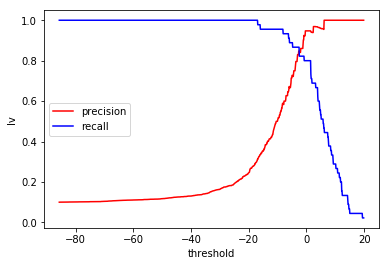

In [45]:
import matplotlib.pyplot as plt
plt.plot(thresholds,precisions,color = 'r',label='precision')
plt.plot(thresholds,recalls,color='b',label='recall')
plt.xlabel('threshold')
plt.ylabel('lv')
plt.legend()
plt.show()

# precision-Recall 曲线

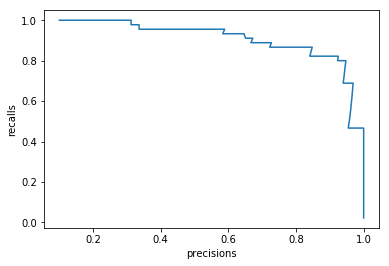

In [28]:
plt.plot(precisions,recalls)
plt.xlabel('precisions')
plt.ylabel('recalls')
plt.show()
'''我们可以清晰的从图中看出随着精准率的提高  召回率逐渐下降
   我们可以看见在0.85的时候召回率急剧下降，这个也可以说明在这个点的时候是我们精准率
   和召回率相对而言最好的一个点
'''

# scikit-learn 中的 precision-recall曲线

In [31]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_test,decision_scores)

In [32]:
precisions.shape

(145,)

In [33]:
recalls.shape

(145,)

In [34]:
'''此处主意他只有144个因为 当precisions=1 recall=0 时  没有threshold'''
thresholds.shape

(144,)

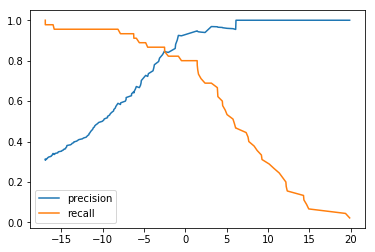

In [40]:
'''因为在scikit-learn中，他取值threshold并没有从decision的最小值开始取，它取得是他认为
最好的那部分数据，因此和我们上面的图像有区别'''
plt.plot(thresholds,precisions[:-1],label='precision')
plt.plot(thresholds,recalls[:-1],label='recall')
plt.legend()
plt.show()

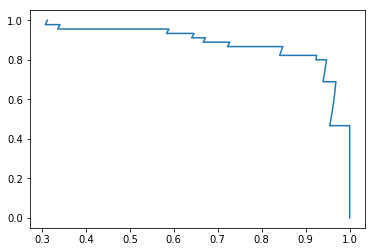

In [41]:
'precision-recall'
plt.plot(precisions,recalls)
plt.show()